## Training & Evaluation

In [13]:
import sys
sys.path.append('..')

import pandas as pd
from src.training.utils import tune_params
from sklearn.linear_model import LogisticRegression
from src.evaluation.utils import plot_confusion_matrix, plot_model_performance, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from joblib import dump

## Load the data

In [14]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')

In [15]:
train_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Loan_Status
0,1.316702,-5.429712,0.960165,-0.556141,0.175540,0.0,0.0,0.0,1.0,0.0,1.0,1
1,1.316702,0.263229,1.176995,0.975741,0.175540,1.0,0.0,0.0,1.0,0.0,1.0,1
2,-0.827104,-0.210840,1.084688,0.042726,-2.312879,1.0,0.0,1.0,0.0,0.0,0.0,0
3,1.316702,1.522016,0.660376,1.139179,0.175540,1.0,0.0,0.0,0.0,1.0,1.0,1
4,1.316702,0.536555,1.137530,-0.149985,0.175540,1.0,0.0,1.0,0.0,0.0,1.0,1


## Hyperparameters Tuning

**Separate features and target**

In [16]:
X_train = train_df.drop(columns=['Loan_Status'])
y_train = train_df['Loan_Status']

X_val = val_df.drop(columns=['Loan_Status'])
y_val = val_df['Loan_Status']

**Tune the hyperparameters**

In [17]:
# best_params = tune_params(X_train, y_train, X_val, y_val, n_trials=100)
# best_params

**Train the best model**

In [18]:
# best_params.pop('classifier')
# print('Best params:', best_params)
# model = LogisticRegression(**best_params)

In [19]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Evaluation

In [20]:
y_pred = model.predict(X_val)
report = classification_report(
    y_pred, y_val, target_names=["Rejected", "Approved"]
)
print(report)

              precision    recall  f1-score   support

    Rejected       0.66      0.66      0.66        29
    Approved       0.84      0.84      0.84        64

    accuracy                           0.78        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.78      0.78      0.78        93



Text(0.5, 1.0, 'Machine learning model')

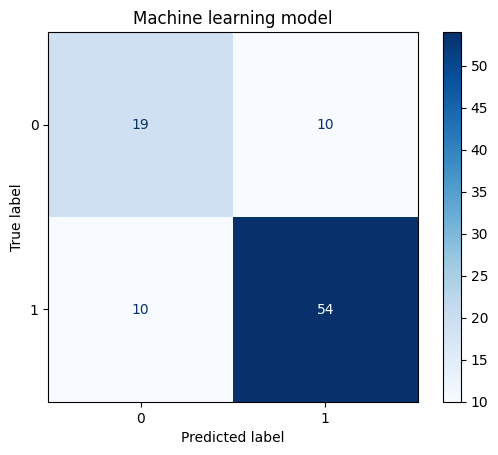

In [21]:
ConfusionMatrixDisplay.from_predictions(
    y_val, y_pred, cmap='Blues',
)
plt.title("Machine learning model")

In [22]:
# plot_roc_curve(
#     model, 
#     X_train, y_train,
#     X_val, y_val,
#     title1="Train", title2="Validation"    
# )

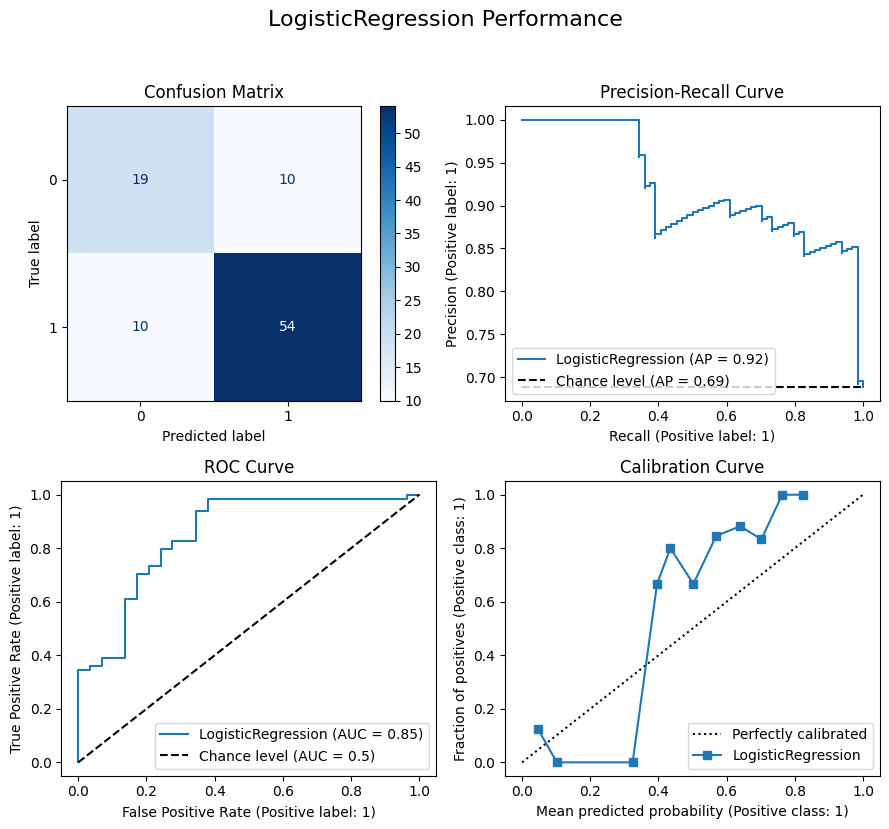

In [23]:
plot_model_performance(model, X_val, y_val)

## Save the model

In [24]:
with open('../models/model.pkl', 'wb') as f:
    dump(model, f)